# Load and transform data for all classifiers

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=columns)

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Bayes Network with pgmpy

I tried to get pgmpy to run for over 2 hours. (I found no other reputable libraries for Bayes networks)
I tried all combinations of python3.11-3.13, anaconda-venv and the latest 3 pgmpy versions.

However, I did some research and found that a Bayesian network has already been built in part A. This is very limited because it only allows the dependencies $C => x_1, x_2, x_n$ and naively assumes that all features $x_1$ to $x_n$ are independent of each other.

Below is some sample code from the pgmpy documentation and one of the encountered errors.

In [ ]:
# Imports
from IPython.display import Image
from pgmpy.utils import get_example_model

# Load the model
ecoli_model = get_example_model('ecoli70')

# Visualize the network
viz = ecoli_model.to_graphviz()
viz.draw('ecoli.png', prog='dot')
Image('ecoli.png')

# Neural Network with Scikit-learn

We already played around with tensorflow in the "Principles of Machine Learning" course.

After encoding the target column and scaling the features, I defined two hidden layers via keras and used the sigmoid activator to get a binary output.

I used the same model optimizer, loss function and metrics in a small task in the "Principles of Machine Learning" course.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models

df = pd.read_excel("Spam.xlsx")

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

X = df.drop(columns=['type'])
y = df['type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}")


C:\Users\Luca\IdeaProjects\_bfh\mmde\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7287 - loss: 0.5631 - val_accuracy: 0.8922 - val_loss: 0.3042
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9009 - loss: 0.2826 - val_accuracy: 0.9138 - val_loss: 0.2393
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.2183 - val_accuracy: 0.9095 - val_loss: 0.2150
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9402 - loss: 0.1834 - val_accuracy: 0.9267 - val_loss: 0.2078
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1752 - val_accuracy: 0.9267 - val_loss: 0.2108
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 0.1417 - val_accuracy: 0.9310 - val_loss: 0.2026
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - loss: 0.1265 - val_accuracy: 0.9310 - val_loss: 0.2003
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - loss: 0.1247 - val_accuracy: 0.9353 - val_loss:

# Clustering with K-Means and DBSCAN

I used the scaled features from the neural network task for clustering.
From scikit-learn I used the KMeans and DBSCAN implementations which we already saw in the "Principles of Machine Learning" course.



In [14]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k_range = range(2, 11)
sil_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

best_k = k_range[int(np.argmax(sil_scores))]
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42).fit(X_scaled)

print("K-Means:")
print(f"best_k = {best_k}")
print(f"silhouette = {max(sil_scores):.3f}")
print("ARI vs. Ground-Truth:", adjusted_rand_score(y, kmeans.labels_))

K-Means:
best_k = 2
silhouette = 0.654
ARI vs. Ground-Truth: 0.00021981648809987954


### DBSCAN and visualization

- First i tried to search the best parameters for DBSCAN using a grid search.
- Then i used PCA to reduce the dimensionality of the data to 2D for visualization in a scatter

Found best DBSCAN parameters: eps = 1.0, min_samples = 3
DBSCAN metrics:
Silhouette: -0.18839263852642982
ARI vs. Ground-Truth: 0.012929483409209642


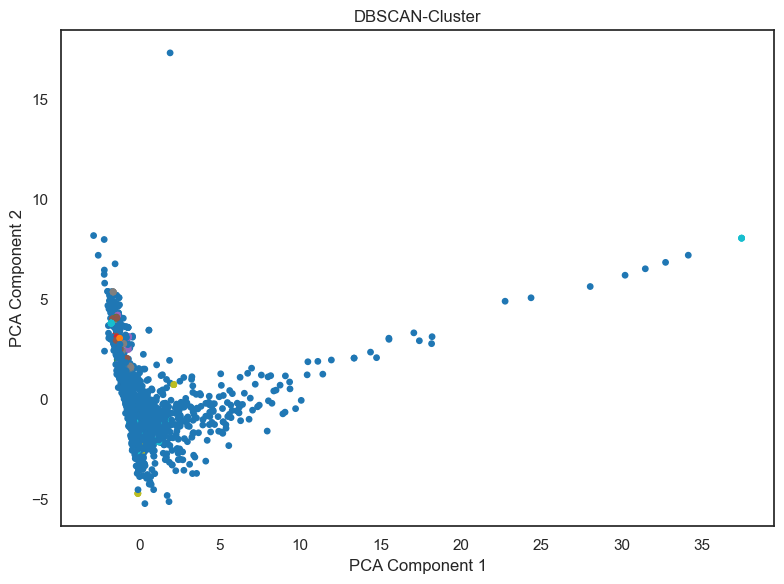

In [20]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

best_ari, best_params = -1, None
for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
        if len(set(db.labels_)) <= 1:
            continue
        ari = adjusted_rand_score(y, db.labels_)
        if ari > best_ari:
            best_ari, best_params = ari, (eps, ms)

eps_opt, ms_opt = best_params
dbscan = DBSCAN(eps=eps_opt, min_samples=ms_opt).fit(X_scaled)

print(f"Found best DBSCAN parameters: eps = {eps_opt}, min_samples = {ms_opt}")

print("DBSCAN metrics:")
print("Silhouette:", silhouette_score(X_scaled, dbscan.labels_))
print("ARI vs. Ground-Truth:", best_ari)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

plt.scatter(X_2d[:, 0], X_2d[:, 1],
            c=dbscan.labels_, s=15, cmap="tab10")
plt.title("DBSCAN-Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()
